In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
# Reading csv data file
data='data.csv'
s_data = pd.read_csv(data)
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


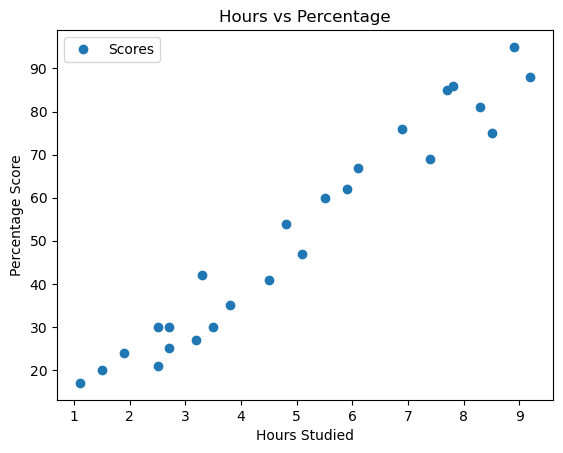

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.




# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


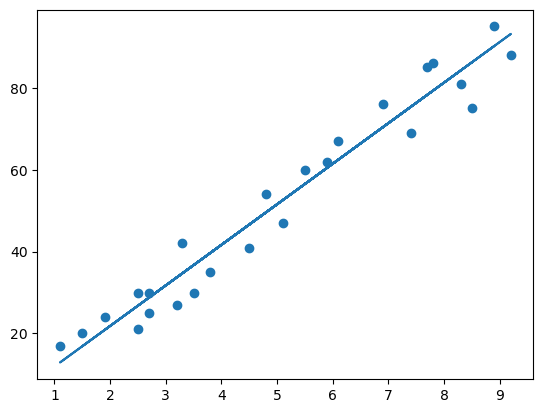

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X,line);
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


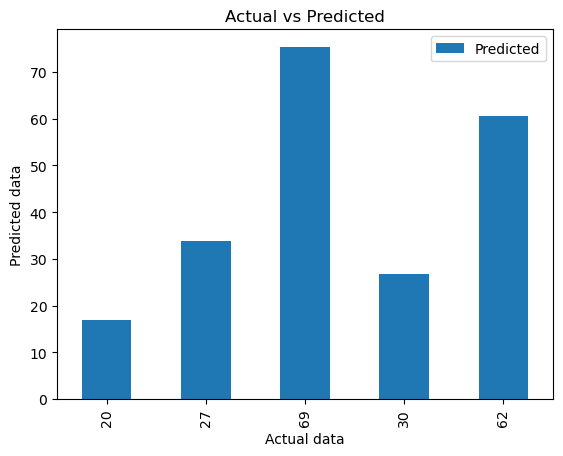

In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df) 
df.plot(x='Actual', y='Predicted', kind='bar')  
plt.title('Actual vs Predicted')  
plt.xlabel('Actual data')  
plt.ylabel('Predicted data')  
plt.show()

In [10]:
# we can also test with our own data
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(1,-1))
print("Hours studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Hours studied = 9.25
Predicted Score = 93.69173248737538


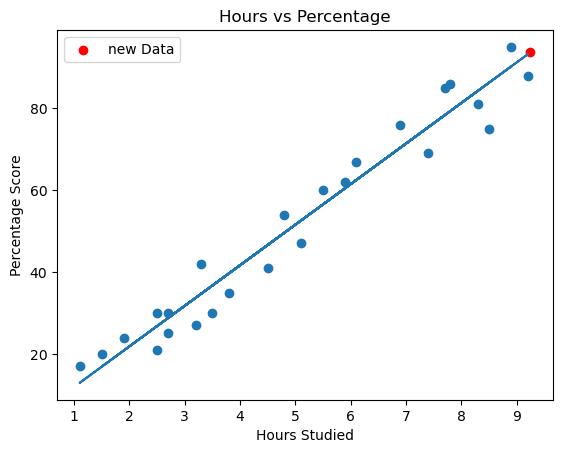

In [11]:
# Existing code for plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);

# plotting the predicted score for our own data
plt.scatter(hours, own_pred, color='red', marker='o', label='new Data')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()


# Evaluating the model
The final step is to evaluate the performance of algorithm. 
This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics like R-Squared.

In [12]:
from sklearn import metrics 
mean_absolute_error= metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mean_absolute_error) 

Mean Absolute Error: 4.183859899002975


In [13]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

R-squared: 0.9454906892105356
